 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#191970;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 30px;text-align:center;
              color:white;">
            Titanic Project
        </p>
    </div>
    </p>
</div>

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#fff0f5;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 30px;text-align:center;
              color:black;">
            The sinking of Titanic is one of the most notorious shipwrecks in the history. 
In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.
        </p>
    </div>
    </p>
</div>



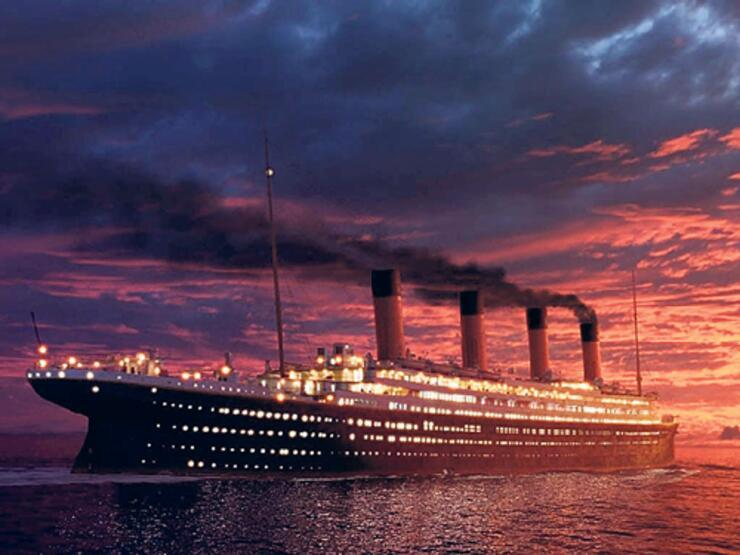

 <div style="color:purple;
           display:fill;
           border-radius:5px;
           background-color:#e6e6fa;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:purple">
            Content

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)
        </p>
    </div>
    </p>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 20px;text-align:center;
              color:#4b0082">
Load and Check Data
        </p>
    </div>
    </p>
</div>

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:#4b0082">
Variable Description<a id = "2"></a><br>
        </p>
    </div>
    </p>
</div>

> 1. PassengerId: unique id number to each passenger
> 1. Survived: passenger survive(1) or died(0)
> 1. Pclass: passenger class
> 1. Name: name
> 1. Sex: gender of passenger 
> 1. Age: age of passenger 
> 1. SibSp: number of siblings/spouses
> 1. Parch: number of parents/children 
> 1. Ticket: ticket number 
> 1. Fare: amount of money spent on ticket
> 1. Cabin: cabin category
> 1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:#4b0082">
Univariate Variable Analysis<a id = "3"></a><br>
        </p>
    </div>
    </p>

1. Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
1. Numerical Variable: Fare, age and passengerId

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:#4b0082">
Categorical Variable<a id = "3"></a><br>
        </p>
    </div>
    </p>

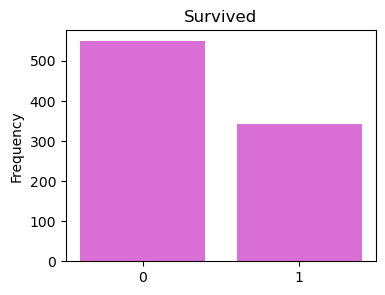

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


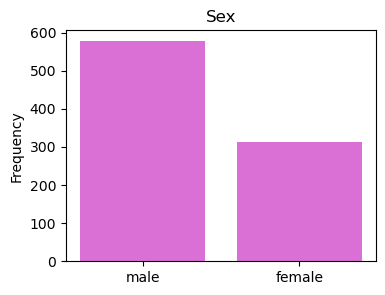

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


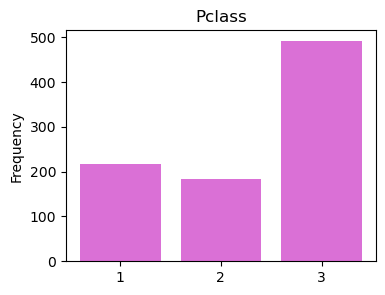

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


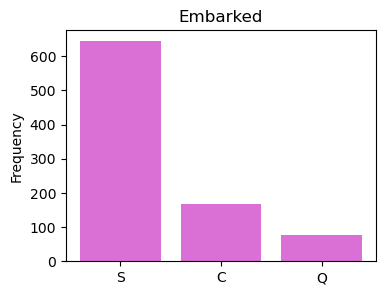

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


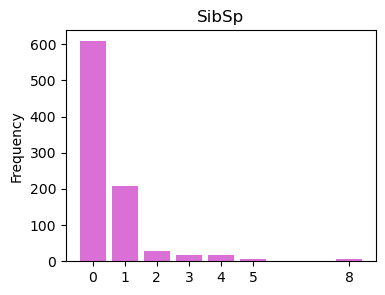

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


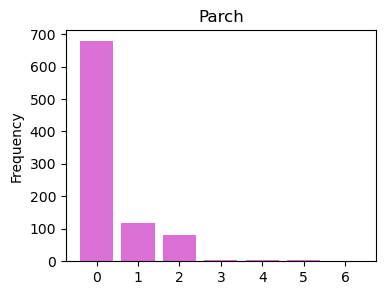

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [7]:
def bar_plot(variable):
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (4,3))
    plt.bar(varValue.index, varValue,color='#da70d6')
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:20px;text-align:center;
              color:#4b0082">
Numerical Variable<a id = "3"></a><br>
        </p>
    </div>
    </p>

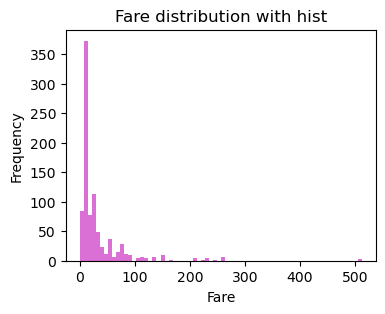

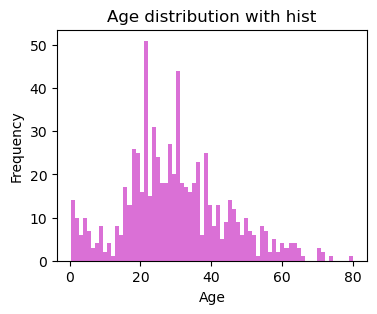

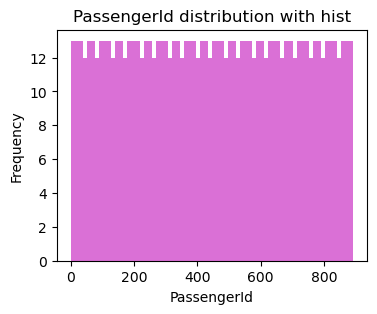

In [8]:
def plot_hist(variable):
    plt.figure(figsize = (4,3))
    plt.hist(train_df[variable], bins = 70,color='#da70d6')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Basic Data Analise <a id = "3"></a><br>
        </p>
    </div>
    </p>

In [9]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Outlier Detection <a id = "7"></a><br>
        </p>
    </div>
    </p>

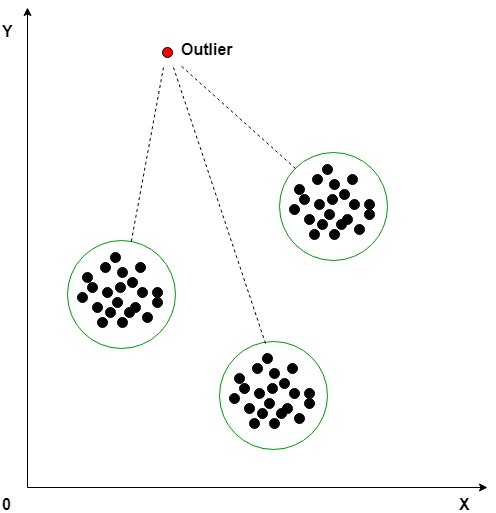

In [16]:
def detect_outliers(df,*features):
    outlier_indices = []
    #np.percentile verilerin yüzdelik dilimini hesaplamak için kullanılır.
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [17]:
# .loc =Etiketleri kullanarak değerler grubuna erişir
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
# drop outliers =Belirtilen etiketleri satırlardan veya sütunlardan çıkarma işlemi 
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Missing Value <a id = "7"></a><br>
        </p>
    </div>
    </p>

In [19]:
#cancat = nesneleri birleştirir
#missing value olmaması için trindf ile testdf birleştirilir
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [20]:
#hangi dataframelerin içinde null değer var ona bakıyoruz
train_df.columns[train_df.isnull().any()]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#sum=kaç tane null değer varsa topla
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Fill Missing Value <a id = "7"></a><br>
        </p>
    </div>
    </p>

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Embarked = 2

In [23]:
#boş değerler veride nerede onu bulmak için 
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [24]:
train_df['Embarked'].fillna('S',inplace=True)
train_df.Embarked.isnull().any()
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


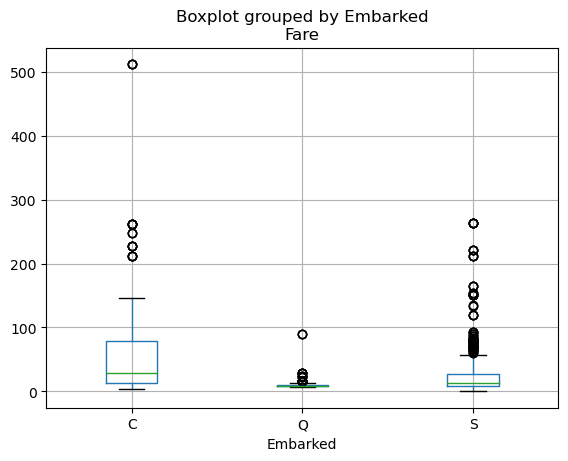

In [25]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [26]:
#fillna =null değerleri yerine eklmek isediğimiz değişkeni yazarız
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Fare = 1

In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

# Age = 263

In [30]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [32]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med
        
        
train_df[train_df["Age"].isnull()]

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Feature Engineering <a id = "7"></a><br>
        </p>
    </div>
    </p>

## Name -- Title

In [33]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(10)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

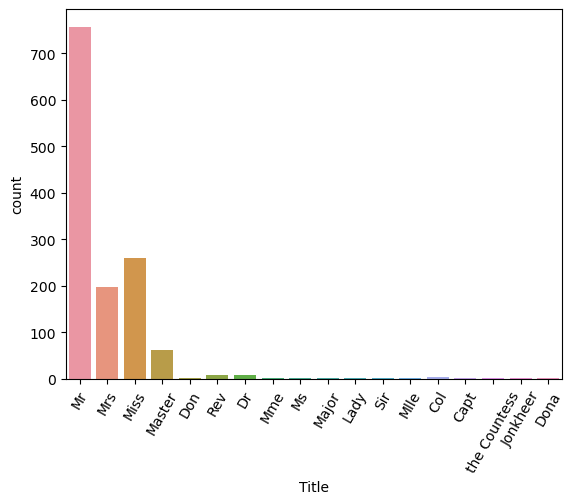

In [34]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [35]:
train_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [36]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].unique()
train_df["Title"].count()

1309

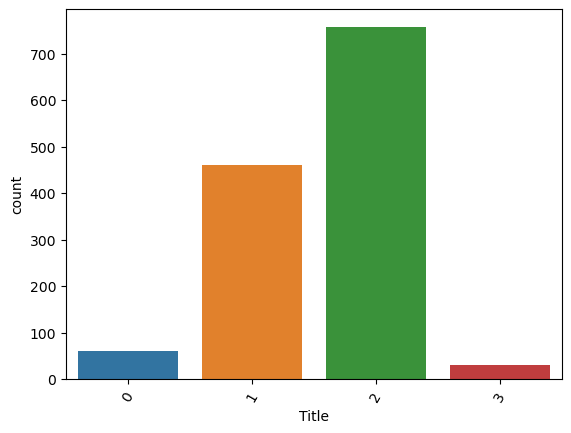

In [37]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [39]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [40]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


## Family Size

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [42]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


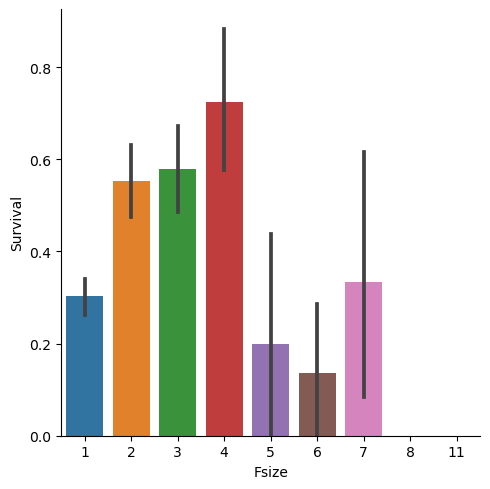

In [43]:
import seaborn as sns

g = sns.catplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [44]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


# Embarked

In [45]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [46]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


# Ticket

In [47]:
train_df["Ticket"].head(20)
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [48]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


# Pclass

In [49]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


# Sex

In [50]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


# Drop Passenger ID and Cabin

In [51]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Modeling <a id = "7"></a><br>
        </p>
    </div>
    </p>

In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Train - Test Split <a id = "7"></a><br>
        </p>
    </div>
    </p>

In [54]:
train_df_len

891

In [55]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)
test.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
891,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
892,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
893,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
894,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
895,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [56]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 596
X_test 295
y_train 596
y_test 295
test 418


<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Simple Logistic Regression <a id = "7"></a><br>
        </p>
    </div>
    </p>

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 83.05
Testing Accuracy: % 83.73


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<div style="color:#008080;
           display:fill;
           border-radius:5px;
           background-color:#ffe4e1;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:10px;text-align:center;
              color:#4b0082">
Hyperparameter Tuning -- Grid Search -- Cross Validation <a id = "7"></a><br>
        </p>
    </div>
    </p>



We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [58]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [59]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.818728813559322
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8054237288135593
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8355084745762712
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

0.8255367231638419
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7820338983050847


In [60]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})
import seaborn as sns
g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

TypeError: barplot() got multiple values for argument 'data'

In [ ]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

In [ ]:
test_df.head()

In [ ]:
test_PassengerId = test_df["PassengerId"]
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)